Objective

The objective of this task is to develop an end-to-end data mining project by using the Python machine learning
library Scikit-Learn. Only the Scikit-Learn library can be used in this task. However, all non-ML libraries
(e.g., SciPy) are allowed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV #fine tuning KNN
from sklearn.preprocessing import QuantileTransformer

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV #fine tuning

(1) This is a classification problem.

(2) Use stratified sampling to select 80% data for training and 20% for testing.

(3) Main steps of the project are (a) “discover and visualise the data”, (b) “prepare the data for machine
learning algorithms”, (c) “select and train models”, (d) “fine-tune the model” and (e) “evaluate the
outcomes”. You can structure the project in your own way. Some steps can be performed more than
once.

(4) In the steps (c) and (d) above, you must work with at least three machine learning algorithms.

(5) In step (b), define at least one new feature by using the User-Defined Transformer. This transformer
includes a parameter indicating whether use the new feature(s) or not. In step (d), fine-tuning step must
use this parameter (as a hyper parameter).


(6) Explanation of each step together with the Python codes must be included.

(7) A comparison of the models’ performance must be included



# (a) Discover and visualise the data

In [ ]:
#Import file from GDrive
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

# Use train data, ignore test data first
train_data = pd.read_csv("/content/gdrive/My Drive/train.csv")

Mounted at /content/gdrive


<ipython-input-2-0ef7fdabf792>:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/gdrive/My Drive/train.csv")


In [ ]:
train_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
train_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


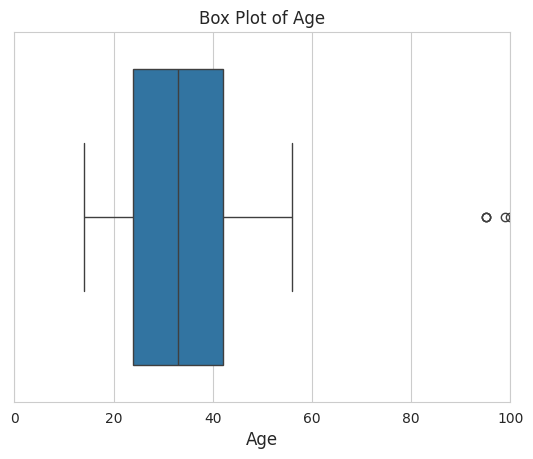

In [ ]:
# Convert 'Age' column to numeric
train_data['Age'] = pd.to_numeric(train_data['Age'], errors='coerce')

# Set the age range to 0-100
age_range = (0, 100)

# Create a boxplot
sns.set_style('whitegrid')
sns.boxplot(x=train_data['Age'])

# Set x-axis limits for better readability
plt.xlim(age_range[0], age_range[1])

# Set labels and title
plt.xlabel('Age', fontsize = 12)
plt.title('Box Plot of Age')

# Show the plot
plt.show()

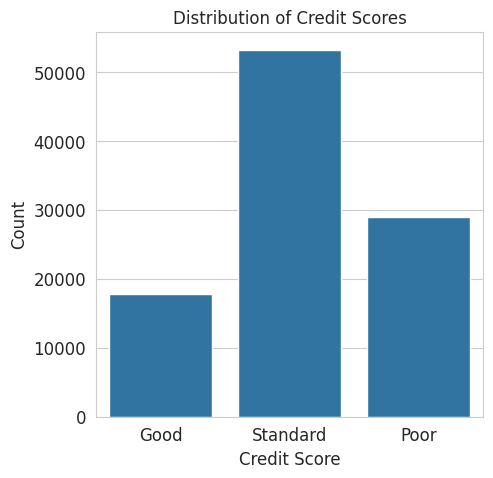

In [ ]:
# Histogram to visualize 'Credit_Score' distribution
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

plt.figure(figsize=(5, 5))

plt.title("Distribution of Credit Scores", fontsize=12)
sns.set(style="whitegrid", palette="pastel")
sns.countplot(x=train_data['Credit_Score'])

plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

<ipython-input-9-647f08312a45>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


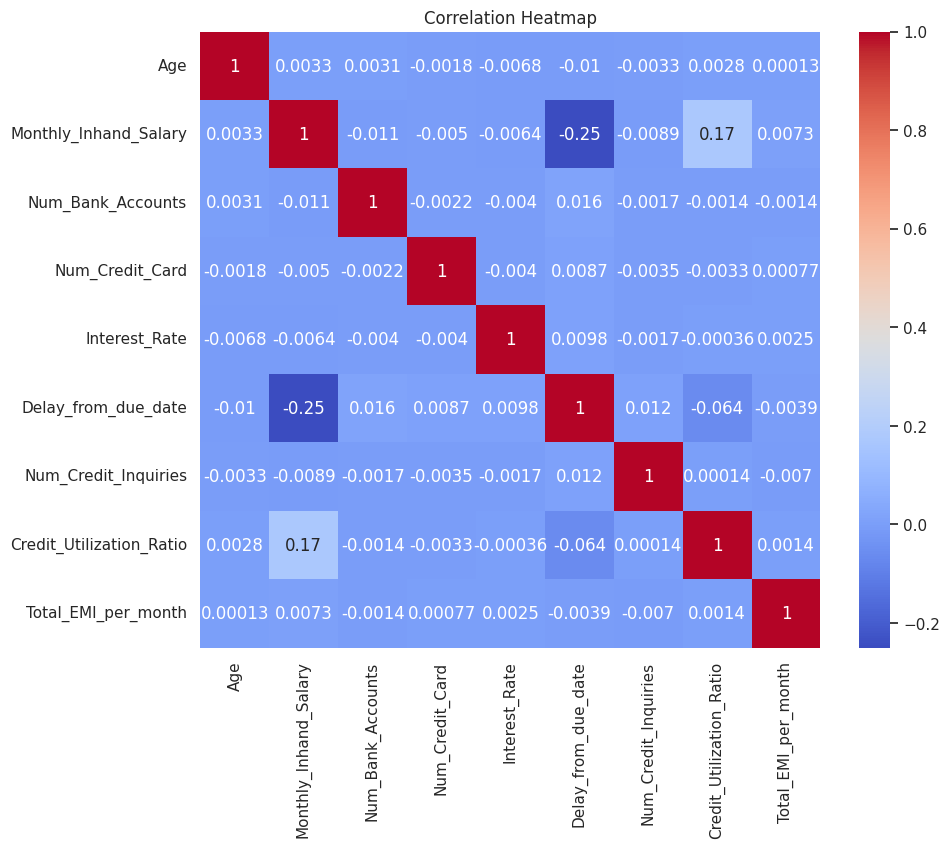

In [ ]:
# Correlation heatmap to identify relationship between numerical variables
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#  (b) Prepare the data for machine learning algorithms

In [ ]:
# Data cleaning
# Remove uneccessary columns that does not affect Credit Score
remove_column = ['ID','Customer_ID','Month','Name','SSN','Type_of_Loan']
train_data = train_data.drop(remove_column, axis = 1)

In [ ]:
# Check that uneccessary colums has been removed
print(train_data.columns)

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [ ]:
print((train_data).iloc[18]) #Before removing '_' for numerical data

Age                                                    34.0
Occupation                                          _______
Annual_Income                                     143162.64
Monthly_Inhand_Salary                                   NaN
Num_Bank_Accounts                                         1
Num_Credit_Card                                           5
Interest_Rate                                             8
Num_of_Loan                                               3
Delay_from_due_date                                       8
Num_of_Delayed_Payment                                    7
Changed_Credit_Limit                                   11.1
Num_Credit_Inquiries                                    NaN
Credit_Mix                                             Good
Outstanding_Debt                                    1303.01
Credit_Utilization_Ratio                          26.519815
Credit_History_Age                   17 Years and 11 Months
Payment_of_Min_Amount                   

In [ ]:
# Remove underscores from numerical columns
def clean_numeric_column(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name].astype(str).str.replace('_', ''), errors='coerce')

# List of columns with the same issue
columns_with_underscores = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Monthly_Balance',
                            'Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly']

# Apply the cleaning function to each column
for column in columns_with_underscores:
    clean_numeric_column(train_data, column)

In [ ]:
print((train_data).iloc[18]) #After removing '_' for numerical data

Age                                                    34.0
Occupation                                          _______
Annual_Income                                     143162.64
Monthly_Inhand_Salary                                   NaN
Num_Bank_Accounts                                         1
Num_Credit_Card                                           5
Interest_Rate                                             8
Num_of_Loan                                               3
Delay_from_due_date                                       8
Num_of_Delayed_Payment                                  7.0
Changed_Credit_Limit                                   11.1
Num_Credit_Inquiries                                    NaN
Credit_Mix                                             Good
Outstanding_Debt                                    1303.01
Credit_Utilization_Ratio                          26.519815
Credit_History_Age                   17 Years and 11 Months
Payment_of_Min_Amount                   

In [ ]:
# Filter rows where 'Age' is between 0 and 100 (inclusive)
train_data = train_data[(train_data['Age'] >= 0) & (train_data['Age'] <= 100)]

In [ ]:
train_data #Check that numerical datas are cleaned

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,Scientist,19114.12,NaN,3,4,3,4,5,4.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,NaN,3,4,3,4,8,4.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.0,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.0,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,20,NaN,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
# Remove underscores from categorical columns
train_data['Credit_Mix'] = train_data['Credit_Mix'].replace(to_replace='_', value=None)
train_data['Occupation'] = train_data['Occupation'].replace(to_replace='_______', value=None)
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].str.replace('_', '', regex=False)

# Remove negative value from 'Num_of_Loan'
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].replace(to_replace='-100', value=None)

<ipython-input-17-9411442d88de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Credit_Mix'] = train_data['Credit_Mix'].replace(to_replace='_', value=None)
<ipython-input-17-9411442d88de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Occupation'] = train_data['Occupation'].replace(to_replace='_______', value=None)


In [ ]:
print((train_data).iloc[16]) #After removing '_' for catergorical data

In [ ]:
print((train_data).iloc[18]) #Before replacing missing values

Age                                                   34.0
Occupation                                        Engineer
Annual_Income                                    143162.64
Monthly_Inhand_Salary                             12187.22
Num_Bank_Accounts                                        1
Num_Credit_Card                                          5
Interest_Rate                                            8
Num_of_Loan                                            3.0
Delay_from_due_date                                     10
Num_of_Delayed_Payment                                 5.0
Changed_Credit_Limit                                   7.1
Num_Credit_Inquiries                                   3.0
Credit_Mix                                            Good
Outstanding_Debt                                   1303.01
Credit_Utilization_Ratio                          31.37615
Credit_History_Age                   18 Years and 1 Months
Payment_of_Min_Amount                                   

In [ ]:
print(train_data.isnull().sum())

Age                             0
Occupation                   6548
Annual_Income                   0
Monthly_Inhand_Salary       13876
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3579
Delay_from_due_date             0
Num_of_Delayed_Payment       6472
Changed_Credit_Limit         1931
Num_Credit_Inquiries         1821
Credit_Mix                  18651
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8339
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4143
Payment_Behaviour               0
Monthly_Balance              1117
Credit_Score                    0
dtype: int64


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92370 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       92370 non-null  float64
 1   Occupation                85822 non-null  object 
 2   Annual_Income             92370 non-null  float64
 3   Monthly_Inhand_Salary     78494 non-null  float64
 4   Num_Bank_Accounts         92370 non-null  int64  
 5   Num_Credit_Card           92370 non-null  int64  
 6   Interest_Rate             92370 non-null  int64  
 7   Num_of_Loan               88791 non-null  object 
 8   Delay_from_due_date       92370 non-null  int64  
 9   Num_of_Delayed_Payment    85898 non-null  float64
 10  Changed_Credit_Limit      90439 non-null  float64
 11  Num_Credit_Inquiries      90549 non-null  float64
 12  Credit_Mix                73719 non-null  object 
 13  Outstanding_Debt          92370 non-null  float64
 14  Credit

In [ ]:
#Convert 'Num_of_Loan' to numerical
train_data['Num_of_Loan'] = pd.to_numeric(train_data['Num_of_Loan'], errors='coerce')

In [ ]:
#Replace missing values using backwards fill
train_data['Credit_Mix'].fillna(method='bfill', inplace=True)
train_data['Occupation'].fillna(method='bfill', inplace=True)

In [ ]:
print((train_data).iloc[18]) #After replacing missing values

Age                                                   34.0
Occupation                                        Engineer
Annual_Income                                    143162.64
Monthly_Inhand_Salary                             12187.22
Num_Bank_Accounts                                        1
Num_Credit_Card                                          5
Interest_Rate                                            8
Num_of_Loan                                            3.0
Delay_from_due_date                                     10
Num_of_Delayed_Payment                                 5.0
Changed_Credit_Limit                                   7.1
Num_Credit_Inquiries                                   3.0
Credit_Mix                                            Good
Outstanding_Debt                                   1303.01
Credit_Utilization_Ratio                          31.37615
Credit_History_Age                   18 Years and 1 Months
Payment_of_Min_Amount                                   

In [ ]:
# Simple Imputer to replace missing values

# Annual_Income
imputer = SimpleImputer(strategy='mean')
Annual_Income = train_data['Annual_Income'].values.reshape(-1,1)
Annual_Income_Imputed = imputer.fit_transform(Annual_Income)
train_data['Annual_Income'] = Annual_Income_Imputed

# Monthly_Inhand_Salary
imputer = SimpleImputer(strategy='mean')
Monthly_Inhand_Salary = train_data['Monthly_Inhand_Salary'].values.reshape(-1,1)
Monthly_Inhand_Salary_Imputed = imputer.fit_transform(Monthly_Inhand_Salary)
train_data['Monthly_Inhand_Salary'] = Monthly_Inhand_Salary_Imputed

# Changed_Credit_Limit
imputer = SimpleImputer(strategy='mean')
Changed_Credit_Limit = train_data['Changed_Credit_Limit'].values.reshape(-1,1)
Changed_Credit_Limit_Imputed = imputer.fit_transform(Changed_Credit_Limit)
train_data['Changed_Credit_Limit'] = Changed_Credit_Limit_Imputed

# Num_Credit_Inquiries
imputer = SimpleImputer(strategy='mean')
Num_Credit_Inquiries = train_data['Num_Credit_Inquiries'].values.reshape(-1,1)
Num_Credit_Inquiries_Imputed = imputer.fit_transform(Num_Credit_Inquiries)
train_data['Num_Credit_Inquiries'] = Num_Credit_Inquiries_Imputed

# Amount_invested_monthly
imputer = SimpleImputer(strategy='mean')
Amount_invested_monthly = train_data['Amount_invested_monthly'].values.reshape(-1,1)
Amount_invested_monthly_Imputed = imputer.fit_transform(Amount_invested_monthly)
train_data['Amount_invested_monthly'] = Amount_invested_monthly_Imputed

# Monthly_Balance
imputer = SimpleImputer(strategy='mean')
Monthly_Balance = train_data['Monthly_Balance'].values.reshape(-1,1)
Monthly_Balance_Imputed = imputer.fit_transform(Monthly_Balance)
train_data['Monthly_Balance'] = Monthly_Balance_Imputed

# Num_of_Loan
imputer = SimpleImputer(strategy='mean')
Num_of_Loan = train_data['Num_of_Loan'].values.reshape(-1,1)
Num_of_Loan_Imputed = imputer.fit_transform(Num_of_Loan)
train_data['Num_of_Loan'] = Num_of_Loan_Imputed

In [ ]:
# Use label encoding to change categorical data to numerical

# Credit_Mix (Good, Bad, Standard)
train_data['Credit_Mix'].unique()
# List of expected categories
credit_mix = ['Good', 'Bad', 'Standard']
# Create an instance of LabelEncoder
encoder = LabelEncoder()
# Fit the encoder on specified categories
encoder.fit(credit_mix)
# Transform catergorical values to numerical codes
train_data['Credit_Mix'] = encoder.transform(train_data['Credit_Mix'])

# Payment_of_Min_Amount (No, NM, Yes)
train_data['Payment_of_Min_Amount'].unique()
payment_of_min_amount = ['No', 'NM', 'Yes']
encoder = LabelEncoder()
encoder.fit(payment_of_min_amount)
train_data['Payment_of_Min_Amount'] = encoder.transform(train_data['Payment_of_Min_Amount'])

# Payment_Behaviour
train_data = train_data[train_data['Payment_Behaviour'] != '!@9#%8']
train_data['Payment_Behaviour'].unique()
payment_behaviour = [
    'High_spent_Large_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Small_value_payments',
    'Low_spent_Large_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Small_value_payments']
encoder = LabelEncoder()
encoder.fit(payment_behaviour)
train_data['Payment_Behaviour'] = encoder.transform(train_data['Payment_Behaviour'])

# Credit_Score (Good, Poor, Standard)
train_data['Credit_Score'].unique()
credit_score = ['Good', 'Poor', 'Standard']
encoder = LabelEncoder()
encoder.fit(credit_score)
train_data['Credit_Score'] = encoder.transform(train_data['Credit_Score'])

# Occupation
train_data['Occupation'].unique()
occupation = ['Accountant', 'Architect', 'Developer',
              'Doctor','Engineer','Entrepreneur',
              'Journalist','Lawyer','Manager',
              'Mechanic','Media_Manager','Musician',
              'Scientist','Teacher','Writer']
encoder = LabelEncoder()
encoder.fit(occupation)
train_data['Occupation'] = encoder.transform(train_data['Occupation'])

<ipython-input-25-851a8d9f1700>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Payment_Behaviour'] = encoder.transform(train_data['Payment_Behaviour'])
<ipython-input-25-851a8d9f1700>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Credit_Score'] = encoder.transform(train_data['Credit_Score'])
<ipython-input-25-851a8d9f1700>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
# Credit_History_Age
train_data = train_data.dropna(subset=['Credit_History_Age']) #Remove 'NA'-Not Applicable and 'nan'-Not a number
train_data['Credit_History_Age'].unique()
credit_history_age = ['0 Years and 1 Months',
                      '0 Years and 10 Months',
                      '0 Years and 11 Months',
                      '0 Years and 2 Months',
                      '0 Years and 3 Months',
                      '0 Years and 4 Months',
                      '0 Years and 5 Months',
                      '0 Years and 6 Months',
                      '0 Years and 7 Months',
                      '0 Years and 8 Months',
                      '0 Years and 9 Months',
                      '1 Years and 0 Months',
                      '1 Years and 1 Months',
                      '1 Years and 10 Months',
                      '1 Years and 11 Months',
                      '1 Years and 2 Months',
                      '1 Years and 3 Months',
                      '1 Years and 4 Months',
                      '1 Years and 5 Months',
                      '1 Years and 6 Months',
                      '1 Years and 7 Months',
                      '1 Years and 8 Months',
                      '1 Years and 9 Months',
                      '10 Years and 0 Months',
                      '10 Years and 1 Months',
                      '10 Years and 10 Months',
                      '10 Years and 11 Months',
                      '10 Years and 2 Months',
                      '10 Years and 3 Months',
                      '10 Years and 4 Months',
                      '10 Years and 5 Months',
                      '10 Years and 6 Months',
                      '10 Years and 7 Months',
                      '10 Years and 8 Months',
                      '10 Years and 9 Months',
                      '11 Years and 0 Months',
                      '11 Years and 1 Months',
                      '11 Years and 10 Months',
                      '11 Years and 11 Months',
                      '11 Years and 2 Months',
                      '11 Years and 3 Months',
                      '11 Years and 4 Months',
                      '11 Years and 5 Months',
                      '11 Years and 6 Months',
                      '11 Years and 7 Months',
                      '11 Years and 8 Months',
                      '11 Years and 9 Months',
                      '12 Years and 0 Months',
                      '12 Years and 1 Months',
                      '12 Years and 10 Months',
                      '12 Years and 11 Months',
                      '12 Years and 2 Months',
                      '12 Years and 3 Months',
                      '12 Years and 4 Months',
                      '12 Years and 5 Months',
                      '12 Years and 6 Months',
                      '12 Years and 7 Months',
                      '12 Years and 8 Months',
                      '12 Years and 9 Months',
                      '13 Years and 0 Months',
                      '13 Years and 1 Months',
                      '13 Years and 10 Months',
                      '13 Years and 11 Months',
                      '13 Years and 2 Months',
                      '13 Years and 3 Months',
                      '13 Years and 4 Months',
                      '13 Years and 5 Months',
                      '13 Years and 6 Months',
                      '13 Years and 7 Months',
                      '13 Years and 8 Months',
                      '13 Years and 9 Months',
                      '14 Years and 0 Months',
                      '14 Years and 1 Months',
                      '14 Years and 10 Months',
                      '14 Years and 11 Months',
                      '14 Years and 2 Months',
                      '14 Years and 3 Months',
                      '14 Years and 4 Months',
                      '14 Years and 5 Months',
                      '14 Years and 6 Months',
                      '14 Years and 7 Months',
                      '14 Years and 8 Months',
                      '14 Years and 9 Months',
                      '15 Years and 0 Months',
                      '15 Years and 1 Months',
                      '15 Years and 10 Months',
                      '15 Years and 11 Months',
                      '15 Years and 2 Months',
                      '15 Years and 3 Months',
                      '15 Years and 4 Months',
                      '15 Years and 5 Months',
                      '15 Years and 6 Months',
                      '15 Years and 7 Months',
                      '15 Years and 8 Months',
                      '15 Years and 9 Months',
                      '16 Years and 0 Months',
                      '16 Years and 1 Months',
                      '16 Years and 10 Months',
                      '16 Years and 11 Months',
                      '16 Years and 2 Months',
                      '16 Years and 3 Months',
                      '16 Years and 4 Months',
                      '16 Years and 5 Months',
                      '16 Years and 6 Months',
                      '16 Years and 7 Months',
                      '16 Years and 8 Months',
                      '16 Years and 9 Months',
                      '17 Years and 0 Months',
                      '17 Years and 1 Months',
                      '17 Years and 10 Months',
                      '17 Years and 11 Months',
                      '17 Years and 2 Months',
                      '17 Years and 3 Months',
                      '17 Years and 4 Months',
                      '17 Years and 5 Months',
                      '17 Years and 6 Months',
                      '17 Years and 7 Months',
                      '17 Years and 8 Months',
                      '17 Years and 9 Months',
                      '18 Years and 0 Months',
                      '18 Years and 1 Months',
                      '18 Years and 10 Months',
                      '18 Years and 11 Months',
                      '18 Years and 2 Months',
                      '18 Years and 3 Months',
                      '18 Years and 4 Months',
                      '18 Years and 5 Months',
                      '18 Years and 6 Months',
                      '18 Years and 7 Months',
                      '18 Years and 8 Months',
                      '18 Years and 9 Months',
                      '19 Years and 0 Months',
                      '19 Years and 1 Months',
                      '19 Years and 10 Months',
                      '19 Years and 11 Months',
                      '19 Years and 2 Months',
                      '19 Years and 3 Months',
                      '19 Years and 4 Months',
                      '19 Years and 5 Months',
                      '19 Years and 6 Months',
                      '19 Years and 7 Months',
                      '19 Years and 8 Months',
                      '19 Years and 9 Months',
                      '2 Years and 0 Months',
                      '2 Years and 1 Months',
                      '2 Years and 10 Months',
                      '2 Years and 11 Months',
                      '2 Years and 2 Months',
                      '2 Years and 3 Months',
                      '2 Years and 4 Months',
                      '2 Years and 5 Months',
                      '2 Years and 6 Months',
                      '2 Years and 7 Months',
                      '2 Years and 8 Months',
                      '2 Years and 9 Months',
                      '20 Years and 0 Months',
                      '20 Years and 1 Months',
                      '20 Years and 10 Months',
                      '20 Years and 11 Months',
                      '20 Years and 2 Months',
                      '20 Years and 3 Months',
                      '20 Years and 4 Months',
                      '20 Years and 5 Months',
                      '20 Years and 6 Months',
                      '20 Years and 7 Months',
                      '20 Years and 8 Months',
                      '20 Years and 9 Months',
                      '21 Years and 0 Months',
                      '21 Years and 1 Months',
                      '21 Years and 10 Months',
                      '21 Years and 11 Months',
                      '21 Years and 2 Months',
                      '21 Years and 3 Months',
                      '21 Years and 4 Months',
                      '21 Years and 5 Months',
                      '21 Years and 6 Months',
                      '21 Years and 7 Months',
                      '21 Years and 8 Months',
                      '21 Years and 9 Months',
                      '22 Years and 0 Months',
                      '22 Years and 1 Months',
                      '22 Years and 10 Months',
                      '22 Years and 11 Months',
                      '22 Years and 2 Months',
                      '22 Years and 3 Months',
                      '22 Years and 4 Months',
                      '22 Years and 5 Months',
                      '22 Years and 6 Months',
                      '22 Years and 7 Months',
                      '22 Years and 8 Months',
                      '22 Years and 9 Months',
                      '23 Years and 0 Months',
                      '23 Years and 1 Months',
                      '23 Years and 10 Months',
                      '23 Years and 11 Months',
                      '23 Years and 2 Months',
                      '23 Years and 3 Months',
                      '23 Years and 4 Months',
                      '23 Years and 5 Months',
                      '23 Years and 6 Months',
                      '23 Years and 7 Months',
                      '23 Years and 8 Months',
                      '23 Years and 9 Months',
                      '24 Years and 0 Months',
                      '24 Years and 1 Months',
                      '24 Years and 10 Months',
                      '24 Years and 11 Months',
                      '24 Years and 2 Months',
                      '24 Years and 3 Months',
                      '24 Years and 4 Months',
                      '24 Years and 5 Months',
                      '24 Years and 6 Months',
                      '24 Years and 7 Months',
                      '24 Years and 8 Months',
                      '24 Years and 9 Months',
                      '25 Years and 0 Months',
                      '25 Years and 1 Months',
                      '25 Years and 10 Months',
                      '25 Years and 11 Months',
                      '25 Years and 2 Months',
                      '25 Years and 3 Months',
                      '25 Years and 4 Months',
                      '25 Years and 5 Months',
                      '25 Years and 6 Months',
                      '25 Years and 7 Months',
                      '25 Years and 8 Months',
                      '25 Years and 9 Months',
                      '26 Years and 0 Months',
                      '26 Years and 1 Months',
                      '26 Years and 10 Months',
                      '26 Years and 11 Months',
                      '26 Years and 2 Months',
                      '26 Years and 3 Months',
                      '26 Years and 4 Months',
                      '26 Years and 5 Months',
                      '26 Years and 6 Months',
                      '26 Years and 7 Months',
                      '26 Years and 8 Months',
                      '26 Years and 9 Months',
                      '27 Years and 0 Months',
                      '27 Years and 1 Months',
                      '27 Years and 10 Months',
                      '27 Years and 11 Months',
                      '27 Years and 2 Months',
                      '27 Years and 3 Months',
                      '27 Years and 4 Months',
                      '27 Years and 5 Months',
                      '27 Years and 6 Months',
                      '27 Years and 7 Months',
                      '27 Years and 8 Months',
                      '27 Years and 9 Months',
                      '28 Years and 0 Months',
                      '28 Years and 1 Months',
                      '28 Years and 10 Months',
                      '28 Years and 11 Months',
                      '28 Years and 2 Months',
                      '28 Years and 3 Months',
                      '28 Years and 4 Months',
                      '28 Years and 5 Months',
                      '28 Years and 6 Months',
                      '28 Years and 7 Months',
                      '28 Years and 8 Months',
                      '28 Years and 9 Months',
                      '29 Years and 0 Months',
                      '29 Years and 1 Months',
                      '29 Years and 10 Months',
                      '29 Years and 11 Months',
                      '29 Years and 2 Months',
                      '29 Years and 3 Months',
                      '29 Years and 4 Months',
                      '29 Years and 5 Months',
                      '29 Years and 6 Months',
                      '29 Years and 7 Months',
                      '29 Years and 8 Months',
                      '29 Years and 9 Months',
                      '3 Years and 0 Months',
                      '3 Years and 1 Months',
                      '3 Years and 10 Months',
                      '3 Years and 11 Months',
                      '3 Years and 2 Months',
                      '3 Years and 3 Months',
                      '3 Years and 4 Months',
                      '3 Years and 5 Months',
                      '3 Years and 6 Months',
                      '3 Years and 7 Months',
                      '3 Years and 8 Months',
                      '3 Years and 9 Months',
                      '30 Years and 0 Months',
                      '30 Years and 1 Months',
                      '30 Years and 10 Months',
                      '30 Years and 11 Months',
                      '30 Years and 2 Months',
                      '30 Years and 3 Months',
                      '30 Years and 4 Months',
                      '30 Years and 5 Months',
                      '30 Years and 6 Months',
                      '30 Years and 7 Months',
                      '30 Years and 8 Months',
                      '30 Years and 9 Months',
                      '31 Years and 0 Months',
                      '31 Years and 1 Months',
                      '31 Years and 10 Months',
                      '31 Years and 11 Months',
                      '31 Years and 2 Months',
                      '31 Years and 3 Months',
                      '31 Years and 4 Months',
                      '31 Years and 5 Months',
                      '31 Years and 6 Months',
                      '31 Years and 7 Months',
                      '31 Years and 8 Months',
                      '31 Years and 9 Months',
                      '32 Years and 0 Months',
                      '32 Years and 1 Months',
                      '32 Years and 10 Months',
                      '32 Years and 11 Months',
                      '32 Years and 2 Months',
                      '32 Years and 3 Months',
                      '32 Years and 4 Months',
                      '32 Years and 5 Months',
                      '32 Years and 6 Months',
                      '32 Years and 7 Months',
                      '32 Years and 8 Months',
                      '32 Years and 9 Months',
                      '33 Years and 0 Months',
                      '33 Years and 1 Months',
                      '33 Years and 2 Months',
                      '33 Years and 3 Months',
                      '33 Years and 4 Months',
                      '33 Years and 5 Months',
                      '33 Years and 6 Months',
                      '33 Years and 7 Months',
                      '33 Years and 8 Months',
                      '4 Years and 0 Months',
                      '4 Years and 1 Months',
                      '4 Years and 10 Months',
                      '4 Years and 11 Months',
                      '4 Years and 2 Months',
                      '4 Years and 3 Months',
                      '4 Years and 4 Months',
                      '4 Years and 5 Months',
                      '4 Years and 6 Months',
                      '4 Years and 7 Months',
                      '4 Years and 8 Months',
                      '4 Years and 9 Months',
                      '5 Years and 0 Months',
                      '5 Years and 1 Months',
                      '5 Years and 10 Months',
                      '5 Years and 11 Months',
                      '5 Years and 2 Months',
                      '5 Years and 3 Months',
                      '5 Years and 4 Months',
                      '5 Years and 5 Months',
                      '5 Years and 6 Months',
                      '5 Years and 7 Months',
                      '5 Years and 8 Months',
                      '5 Years and 9 Months',
                      '6 Years and 0 Months',
                      '6 Years and 1 Months',
                      '6 Years and 10 Months',
                      '6 Years and 11 Months',
                      '6 Years and 2 Months',
                      '6 Years and 3 Months',
                      '6 Years and 4 Months',
                      '6 Years and 5 Months',
                      '6 Years and 6 Months',
                      '6 Years and 7 Months',
                      '6 Years and 8 Months',
                      '6 Years and 9 Months',
                      '7 Years and 0 Months',
                      '7 Years and 1 Months',
                      '7 Years and 10 Months',
                      '7 Years and 11 Months',
                      '7 Years and 2 Months',
                      '7 Years and 3 Months',
                      '7 Years and 4 Months',
                      '7 Years and 5 Months',
                      '7 Years and 6 Months',
                      '7 Years and 7 Months',
                      '7 Years and 8 Months',
                      '7 Years and 9 Months',
                      '8 Years and 0 Months',
                      '8 Years and 1 Months',
                      '8 Years and 10 Months',
                      '8 Years and 11 Months',
                      '8 Years and 2 Months',
                      '8 Years and 3 Months',
                      '8 Years and 4 Months',
                      '8 Years and 5 Months',
                      '8 Years and 6 Months',
                      '8 Years and 7 Months',
                      '8 Years and 8 Months',
                      '8 Years and 9 Months',
                      '9 Years and 0 Months',
                      '9 Years and 1 Months',
                      '9 Years and 10 Months',
                      '9 Years and 11 Months',
                      '9 Years and 2 Months',
                      '9 Years and 3 Months',
                      '9 Years and 4 Months',
                      '9 Years and 5 Months',
                      '9 Years and 6 Months',
                      '9 Years and 7 Months',
                      '9 Years and 8 Months',
                      '9 Years and 9 Months']
encoder = LabelEncoder()
encoder.fit(credit_history_age)
train_data['Credit_History_Age'] = encoder.transform(train_data['Credit_History_Age'])

<ipython-input-26-50308c80c89a>:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Credit_History_Age'] = encoder.transform(train_data['Credit_History_Age'])


In [ ]:
train_data.head(20)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,1,809.98,26.822620,180,1,49.574949,80.415295,2,312.494089,0
3,23.0,12,19114.12,4196.147872,3,4,3,4.0,5,4.0,...,1,809.98,31.377862,185,1,49.574949,199.458074,5,223.451310,0
4,23.0,12,19114.12,1824.843333,3,4,3,4.0,6,NaN,...,1,809.98,24.797347,186,1,49.574949,41.420153,1,341.489231,0
6,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,8.0,...,1,809.98,22.537593,188,1,49.574949,178.344067,5,244.565317,0
9,28.0,13,34847.84,3037.986667,2,4,6,1.0,7,1.0,...,1,605.03,38.550848,237,1,18.816215,40.391238,0,484.591214,0
10,28.0,13,34847.84,3037.986667,2,1385,6,1.0,3,-1.0,...,1,605.03,33.224951,238,1,18.816215,58.515976,0,466.466476,2
11,28.0,13,34847.84,4196.147872,2,4,6,1.0,3,3.0,...,1,605.03,39.182656,229,1,18.816215,99.306228,4,465.676224,0
12,28.0,13,34847.84,3037.986667,2,4,6,1.0,3,1.0,...,1,605.03,34.977895,230,1,18.816215,130.115420,5,444.867032,0
13,28.0,13,34847.84,3037.986667,2,4,6,1.0,3,0.0,...,1,605.03,33.381010,239,1,18.816215,43.477190,0,481.505262,0
14,28.0,13,34847.84,4196.147872,2,4,6,1.0,3,4.0,...,1,605.03,31.131702,240,0,18.816215,70.101774,1,464.880678,0


In [ ]:
# Replace null with relevant values to reduce data loss
#Num_of_Delayed_Payment (if left blank = no delayed payments)
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].fillna(0)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77649 entries, 0 to 99998
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       77649 non-null  float64
 1   Occupation                77649 non-null  int64  
 2   Annual_Income             77649 non-null  float64
 3   Monthly_Inhand_Salary     77649 non-null  float64
 4   Num_Bank_Accounts         77649 non-null  int64  
 5   Num_Credit_Card           77649 non-null  int64  
 6   Interest_Rate             77649 non-null  int64  
 7   Num_of_Loan               77649 non-null  float64
 8   Delay_from_due_date       77649 non-null  int64  
 9   Num_of_Delayed_Payment    77649 non-null  float64
 10  Changed_Credit_Limit      77649 non-null  float64
 11  Num_Credit_Inquiries      77649 non-null  float64
 12  Credit_Mix                77649 non-null  int64  
 13  Outstanding_Debt          77649 non-null  float64
 14  Credit

In [ ]:
train_data.head(20)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,1,809.98,26.822620,180,1,49.574949,80.415295,2,312.494089,0
3,23.0,12,19114.12,4196.147872,3,4,3,4.0,5,4.0,...,1,809.98,31.377862,185,1,49.574949,199.458074,5,223.451310,0
4,23.0,12,19114.12,1824.843333,3,4,3,4.0,6,0.0,...,1,809.98,24.797347,186,1,49.574949,41.420153,1,341.489231,0
6,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,8.0,...,1,809.98,22.537593,188,1,49.574949,178.344067,5,244.565317,0
9,28.0,13,34847.84,3037.986667,2,4,6,1.0,7,1.0,...,1,605.03,38.550848,237,1,18.816215,40.391238,0,484.591214,0
10,28.0,13,34847.84,3037.986667,2,1385,6,1.0,3,-1.0,...,1,605.03,33.224951,238,1,18.816215,58.515976,0,466.466476,2
11,28.0,13,34847.84,4196.147872,2,4,6,1.0,3,3.0,...,1,605.03,39.182656,229,1,18.816215,99.306228,4,465.676224,0
12,28.0,13,34847.84,3037.986667,2,4,6,1.0,3,1.0,...,1,605.03,34.977895,230,1,18.816215,130.115420,5,444.867032,0
13,28.0,13,34847.84,3037.986667,2,4,6,1.0,3,0.0,...,1,605.03,33.381010,239,1,18.816215,43.477190,0,481.505262,0
14,28.0,13,34847.84,4196.147872,2,4,6,1.0,3,4.0,...,1,605.03,31.131702,240,0,18.816215,70.101774,1,464.880678,0


In [ ]:
#Check missing values
print(train_data.isnull().sum())

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [ ]:
train_data #Check cleaned data

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,1,809.98,26.822620,180,1,49.574949,80.415295,2,312.494089,0
3,23.0,12,19114.12,4196.147872,3,4,3,4.0,5,4.0,...,1,809.98,31.377862,185,1,49.574949,199.458074,5,223.451310,0
4,23.0,12,19114.12,1824.843333,3,4,3,4.0,6,0.0,...,1,809.98,24.797347,186,1,49.574949,41.420153,1,341.489231,0
6,23.0,12,19114.12,1824.843333,3,4,3,4.0,3,8.0,...,1,809.98,22.537593,188,1,49.574949,178.344067,5,244.565317,0
9,28.0,13,34847.84,3037.986667,2,4,6,1.0,7,1.0,...,1,605.03,38.550848,237,1,18.816215,40.391238,0,484.591214,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,9,39628.99,3359.415833,4,6,7,2.0,20,6.0,...,1,502.38,39.323569,306,1,35.104023,140.581403,1,410.256158,1
99995,25.0,9,39628.99,3359.415833,4,6,7,2.0,23,7.0,...,1,502.38,34.663572,307,1,35.104023,60.971333,0,479.866228,1
99996,25.0,9,39628.99,3359.415833,4,6,7,2.0,18,7.0,...,1,502.38,40.565631,308,1,35.104023,54.185950,1,496.651610,1
99997,25.0,9,39628.99,3359.415833,4,6,5729,2.0,27,6.0,...,1,502.38,41.255522,309,1,35.104023,24.028477,0,516.809083,1


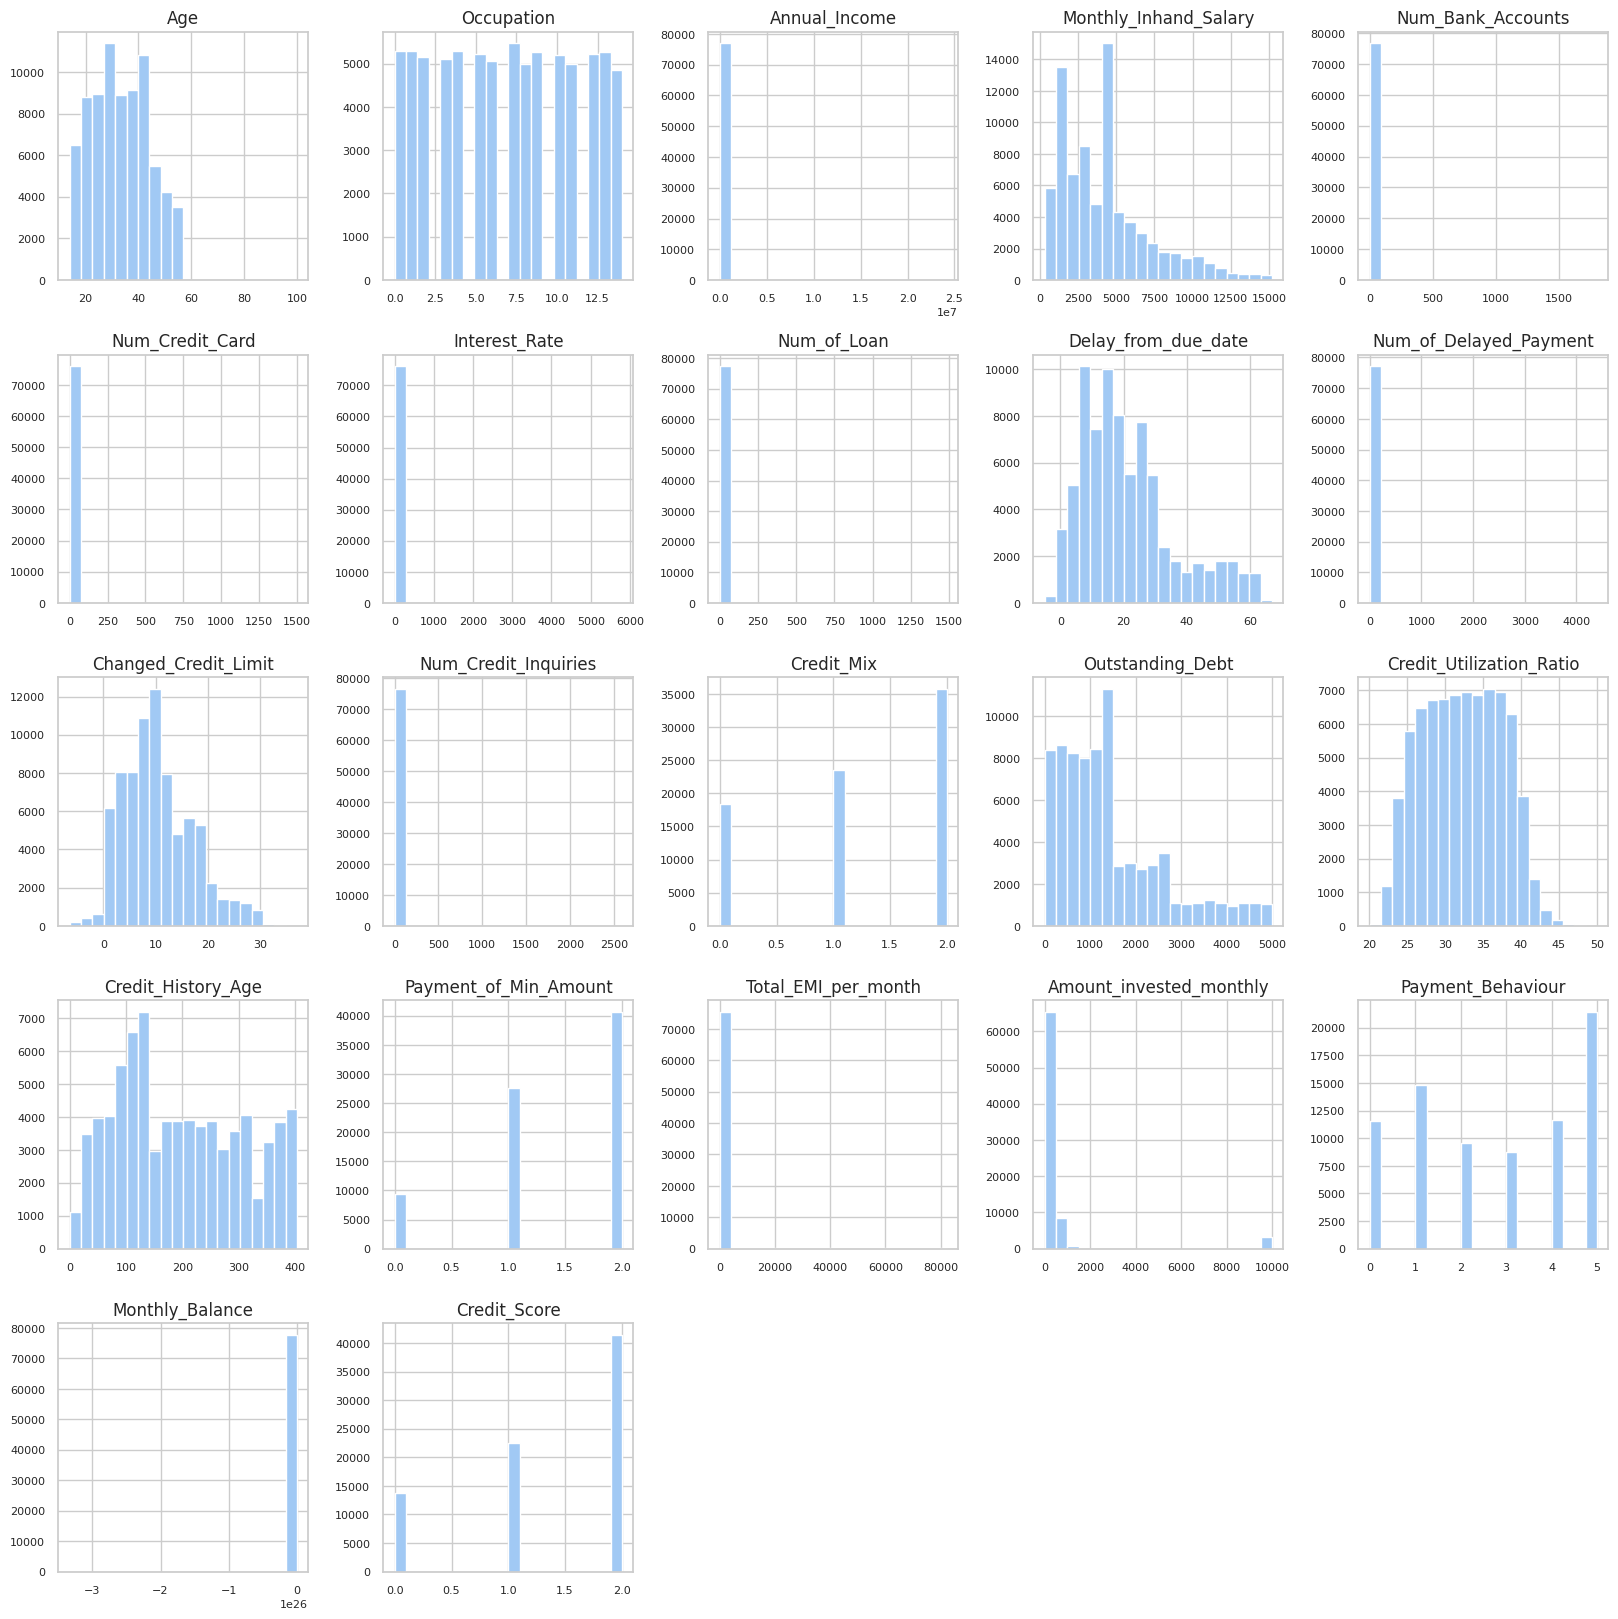

In [ ]:
# Histogram to visualize numerical data after data cleaning
mpl.rc('axes', labelsize=8)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)

train_data.hist(bins=20, figsize=(20,20))
plt.show()

In [ ]:
#Check data types
print(train_data.dtypes)

Age                         float64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object


In [ ]:
train_data.describe()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,77649.000000,77649.000000,7.764900e+04,77649.000000,77649.000000,77649.000000,77649.000000,77649.000000,77649.000000,77649.000000,...,77649.000000,77649.000000,77649.000000,77649.000000,77649.000000,77649.000000,77649.000000,77649.000000,7.764900e+04,77649.000000
mean,33.331968,6.954037,1.788872e+05,4200.889713,17.070394,22.714523,72.901840,7.089531,21.063104,29.063710,...,1.222682,1426.887036,32.298995,195.719314,1.402671,1399.294604,635.222206,2.752411,-3.473421e+22,1.355858
std,10.786320,4.312178,1.451316e+06,2937.715075,117.185815,129.943398,468.986022,58.407577,14.879053,220.118743,...,0.804590,1154.780043,5.117644,110.330369,0.693839,8274.865512,1991.635616,1.847098,3.383265e+24,0.763647
min,14.000000,0.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,...,0.000000,0.230000,20.100770,0.000000,0.000000,0.000000,0.000000,0.000000,-3.333333e+26,0.000000
25%,24.000000,3.000000,1.946292e+04,1797.125000,3.000000,4.000000,8.000000,2.000000,10.000000,8.000000,...,1.000000,568.810000,28.068382,105.000000,1.000000,30.370735,77.114559,1.000000,2.676161e+02,1.000000
50%,33.000000,7.000000,3.767919e+04,3867.175000,6.000000,5.000000,14.000000,3.000000,18.000000,13.000000,...,1.000000,1166.470000,32.328741,182.000000,2.000000,69.379837,143.642961,3.000000,3.346196e+02,2.000000
75%,42.000000,11.000000,7.308344e+04,5398.265000,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,...,2.000000,1945.030000,36.508237,291.000000,2.000000,161.499680,305.314789,5.000000,4.686027e+02,2.000000
max,100.000000,14.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1485.000000,67.000000,4397.000000,...,2.000000,4998.070000,50.000000,403.000000,2.000000,82331.000000,10000.000000,5.000000,1.602041e+03,2.000000


In [ ]:
from imblearn.over_sampling import SMOTE

# Oversampling
def Oversampling(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                        stratify=y,random_state=random_state)

    # Instantiate the SMOTE object
    smote = SMOTE(random_state=42)
    # Perform SMOTE only on the training data
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    return X_train_balanced, X_test, y_train_balanced, y_test

# (c) Select and train models

In [ ]:
#used through out the different models
X = train_data.drop(columns=['Credit_Score'])  #features
y = train_data['Credit_Score']  #target variable

X_train, X_test, y_train, y_test = Oversampling(X, y, test_size=0.2, random_state=42) #overbalance plus stratified sampling

In [ ]:
#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_KNN = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_KNN))
print("\nClassification Report:\n", classification_report(y_test, y_pred_KNN))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_KNN))

Accuracy: 0.6149388280746941

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.71      0.54      2748
           1       0.62      0.74      0.67      4507
           2       0.76      0.52      0.61      8275

    accuracy                           0.61     15530
   macro avg       0.60      0.66      0.61     15530
weighted avg       0.66      0.61      0.62     15530


Confusion Matrix:
 [[1956  194  598]
 [ 425 3325  757]
 [2176 1830 4269]]


In [ ]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_DT = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("\nClassification Report:\n", classification_report(y_test, y_pred_DT))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_DT))

Accuracy: 0.6880875724404378

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.64      0.61      2748
           1       0.66      0.69      0.68      4507
           2       0.74      0.70      0.72      8275

    accuracy                           0.69     15530
   macro avg       0.66      0.68      0.67     15530
weighted avg       0.69      0.69      0.69     15530


Confusion Matrix:
 [[1765  173  810]
 [ 181 3109 1217]
 [1057 1406 5812]]


In [ ]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7792659368963297

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.80      0.73      2748
           1       0.77      0.82      0.79      4507
           2       0.84      0.75      0.79      8275

    accuracy                           0.78     15530
   macro avg       0.76      0.79      0.77     15530
weighted avg       0.79      0.78      0.78     15530


Confusion Matrix:
 [[2194   21  533]
 [ 146 3710  651]
 [ 960 1117 6198]]


# (d) Fine-tune the model & (e) Evaluate the outcome


In [ ]:
def AddFeature(df):
  df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']
  return df

In [ ]:
def finetuning(use, df):
  if(use=='yes'):
    df = AddFeature(df)

  X = train_data.drop(columns=['Credit_Score'])  #features
  y = train_data['Credit_Score']  #target variable

  X_train, X_test, y_train, y_test = Oversampling(X, y, test_size=0.2, random_state=42)

  return  X_train, X_test, y_train, y_test

In [ ]:
#KNN with Quantile Transformer
X_train, X_test, y_train, y_test = finetuning('yes',train_data)
scaler = QuantileTransformer()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

# Split the transformed data for fine-tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_transformed, y_train, test_size=0.1, random_state=42)

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Create a KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_subset, y_train_subset)

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']

# Using the best k to fine-tune the KNN model
knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the transformed training data
knn.fit(X_train_transformed, y_train)

# Make predictions on the transformed test data
y_pred_knn = knn.predict(X_test_transformed)

# Evaluate the model
print("KNN Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Model:
Accuracy: 0.6837089504185447

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.69      0.63      2748
           1       0.65      0.70      0.67      4507
           2       0.75      0.67      0.71      8275

    accuracy                           0.68     15530
   macro avg       0.66      0.69      0.67     15530
weighted avg       0.69      0.68      0.69     15530


Confusion Matrix:
 [[1892  162  694]
 [ 198 3151 1158]
 [1144 1556 5575]]


In [ ]:
#Decision Tree
X_train, X_test, y_train, y_test = finetuning('yes',train_data)
param_grid = {
    'max_depth': [5, 7, 10],  # Moderate maximum depth
    'min_samples_split': [1000, 2000, 5000]  # Larger minimum samples split
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#training after fine tuning
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)

y_pred_DT2 = best_dt_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_DT2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_DT2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_DT2))

Best Parameters: {'max_depth': 10, 'min_samples_split': 1000}
Accuracy: 0.6912427559562138

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.81      0.63      2748
           1       0.68      0.72      0.70      4507
           2       0.82      0.64      0.72      8275

    accuracy                           0.69     15530
   macro avg       0.67      0.72      0.68     15530
weighted avg       0.72      0.69      0.70     15530


Confusion Matrix:
 [[2232   90  426]
 [ 511 3237  759]
 [1577 1432 5266]]


In [ ]:
#Random Forest
# Define the parameter grid
X_train, X_test, y_train, y_test = finetuning('yes',train_data)

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 0.5]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Adjust the number of iterations as needed
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Perform randomized search on the training data
random_search.fit(X_train, y_train)

# Get the best parameters from the randomized search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}
Best Model Accuracy: 0.7858982614294913

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.74      2748
           1       0.77      0.83      0.80      4507
           2       0.84      0.76      0.80      8275

    accuracy                           0.79     15530
   macro avg       0.76      0.79      0.78     15530
weighted avg       0.79      0.79      0.79     15530


Confusion Matrix:
 [[2173   31  544]
 [ 115 3740  652]
 [ 868 1115 6292]]
